# Load Packages

In [43]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Load Data Points (Do not modify the following block)

We have 15 number of data
Coefficients of the original polynomial
w0:-0.467  w1:-0.005  w2:0.281  w3:-0.054  


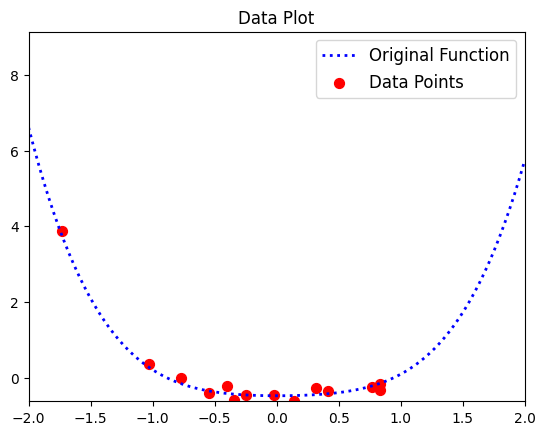

In [44]:
with open('training_data.npz', 'rb') as f:
    data = np.load(f)

    x_list = data['x_list']
    y_list = data['y_list']

    x_data = data['x_data']
    y_data = data['y_data']
    n_data = len(x_data)
    
    w = data['w']
    original_degree = data['order']
    
# Print information of original function.
print("=================================")
print("We have", n_data, "number of data")

print("=================================")
weight_info_string = ''
for d in range(original_degree):
    weight_info_string += 'w'+str(d)+':'+str(round(w[d],ndigits=3))+'  '
print("Coefficients of the original polynomial")
print(weight_info_string)
print("=================================")
    
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

# Polynomial Regression (Programming Assignment)
### Variable Explanation (Do not change variable names)
- 'w' is true coefficients of the original polynomial function
- 'original_degree' is the order of the original polynomial function
- 'x_list' is a list of the points at $x$-axis
- 'y_list' is a list of function value $f(x)$ corresponding to 'x_list'. In other words, y_list = $f($x_list$)$
- 'x_data' is an input data
- 'y_data' is an output data
- 'n_data' is the number of data points

### Our goal is to estimate 'w' from data points, 'x_data' and 'y_data'. Answer the following problems.

### 1. Compute a Vandermonde matrix when the degree of polynomial is $4$ (30pt)
- The variable 'degree' is the order of polynomial. In this problem, we set degree=$4$
- Use the variable 'A' for the Vandermonde matrix. Now, 'A' is initialized as a zero matrix whose elements are all zero. Fill in the element of the Vandermonde matrix by using power operator (\*\*), for loop, and np.concatenation.

In [45]:
degree = 4
A = np.zeros((n_data, degree+1)) # Dummy initialization
for i in range(n_data):
    for j in range(degree + 1):
        k = x_data[i]**j
        A[i][j] = k 

### Print results (do not modify the following block)

In [46]:
print(A)

[[ 1.00000000e+00  7.69458258e-01  5.92066011e-01  4.55570081e-01
   3.50542161e-01]
 [ 1.00000000e+00 -5.48726825e-01  3.01101129e-01 -1.65222266e-01
   9.06618896e-02]
 [ 1.00000000e+00 -3.96088994e-01  1.56886491e-01 -6.21410124e-02
   2.46133711e-02]
 [ 1.00000000e+00 -3.44457358e-01  1.18650871e-01 -4.08701656e-02
   1.40780292e-02]
 [ 1.00000000e+00 -1.73259726e+00  3.00189326e+00 -5.20107204e+00
   9.01136317e+00]
 [ 1.00000000e+00 -1.02635747e+00  1.05340965e+00 -1.08117486e+00
   1.10967189e+00]
 [ 1.00000000e+00  8.31832735e-01  6.91945699e-01  5.75583083e-01
   4.78788850e-01]
 [ 1.00000000e+00  4.18095727e-01  1.74804037e-01  7.30848209e-02
   3.05564513e-02]
 [ 1.00000000e+00 -7.73450895e-01  5.98226287e-01 -4.62698657e-01
   3.57874691e-01]
 [ 1.00000000e+00  1.41388300e-01  1.99906515e-02  2.82644423e-03
   3.99626146e-04]
 [ 1.00000000e+00  3.16614871e-01  1.00244977e-01  3.17390503e-02
   1.00490553e-02]
 [ 1.00000000e+00  8.32089704e-01  6.92373276e-01  5.76116675e-01

### 2. Compute the coefficients of polynomial regression using a $4$ degree polynomial  (40pt)
- Use the variable 'degree' and the Vandermonde matrix 'A' in Problem 1.
- The variable 'w_est' is the coefficients of polynomial regression. Now, 'w_est' is initialized as a zero vector. Compute the 'w_est' from 'A' and 'y'
- The variable 'y_est' is an estimated function value corresponding to the input points 'x_list'. Now, it is a zero list and fill the list by computing the estimated function values. In other words, y_est = $\hat{f}($x_list$)$

We know Y = A · W. So, W = A<sup>-1</sup> · Y. But in this case, n > d, so we have to apply the Pseudo Inverse (the left one), so:

A<sup>+</sup> = (A<sup>T</sup> · A)<sup>-1</sup> · A<sup>T</sup>

So now, first we will define A<sup>T</sup>, needed for the calculus.

In [47]:
atrans = A.transpose()
## w_est = np.dot(ainv, y_data)
y_est = np.zeros_like(x_list)


And now, we will multiply A<sup>T</sup> with A and invert it.

In [48]:
at_dot_a = np.matmul(atrans, A)
at_dot_a_inv = np.linalg.inv(at_dot_a)

Finally, we multiply this result with A<sup>T</sup>, which multiplied back by A should give us the Identity matrix (in check var)

In [49]:
a_pseudo_inv = np.matmul(at_dot_a_inv, atrans)
check = np.rint(np.matmul(a_pseudo_inv, A))
check

array([[ 1.,  0., -0.,  0., -0.],
       [-0.,  1., -0.,  0., -0.],
       [-0.,  0.,  1.,  0., -0.],
       [-0.,  0., -0.,  1., -0.],
       [-0., -0.,  0.,  0.,  1.]])

So now that we have A<sup>-1</sup> (now A<sup>+</sup>), we can finally calculate W = A<sup>+</sup> · Y.

In [50]:
w_est = np.matmul(a_pseudo_inv, y_data)
print("The coefficients are: ")
print(w_est)

The coefficients are: 
[-0.44892915  0.04218512  0.29573867 -0.22965006  0.26044299]


I defined the following function to apply the function f(x) to every data in *x_data*, so we can calculate *y_est*:

In [51]:
def applycoef(n):
    k = len(w_est)
    sum = 0
    for i in range(k):
        sum += w_est[i] * (x_list[n]**i)
    return sum

In [52]:
y_est = [applycoef(i) for i in range(len(x_list))]

### Print results (do not modify the following block)

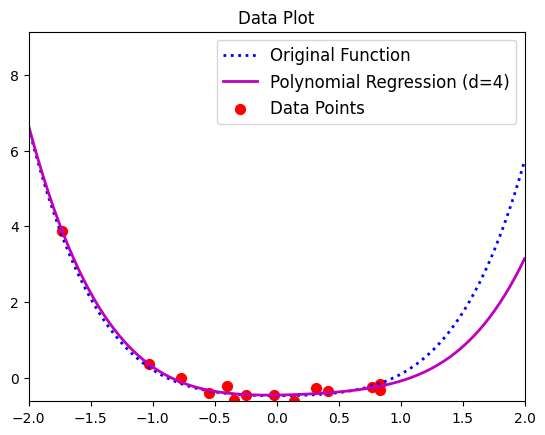

In [53]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est, 'm-', linewidth=2, label="Polynomial Regression (d={})".format(degree))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

### 3. Compute the polynomial regression with $1$ degree polynomials (15pt)
- Repeat Problem 1 and Problem 2 with degree $1$.
- Use the following variables.
> degree1, A1, w_est1, y_est1

In [54]:
degree1 = 1
A1 = np.zeros((n_data, degree1+1)) 
for i in range(n_data):
    for j in range(degree1 + 1):
        k = x_data[i]**j
        A1[i][j] = k 
a1trans = A1.transpose()
## w_est = np.dot(ainv, y_data)
y_est1 = np.zeros_like(x_list)
a1t_dot_a1 = np.matmul(a1trans, A1)
a1t_dot_a1_inv = np.linalg.inv(a1t_dot_a1)
a1_pseudo_inv = np.matmul(a1t_dot_a1_inv, a1trans)
w_est1 = np.matmul(a1_pseudo_inv, y_data)

def applycoef1(n):
    k = len(w_est1)
    sum = 0
    for i in range(k):
        sum += w_est1[i] * (x_list[n]**i)
    return sum

y_est1 = [applycoef1(i) for i in range(len(x_list))]

### Print results (do not modify the following block)

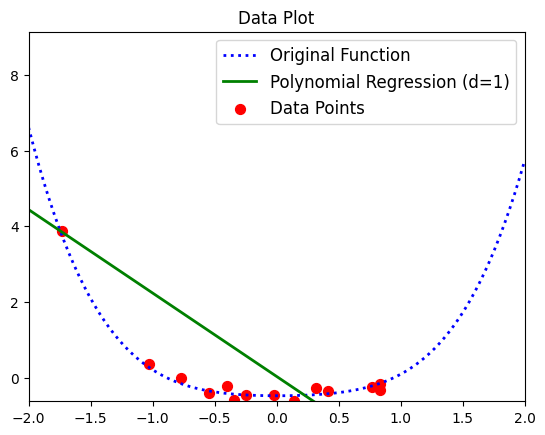

In [55]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est1, 'g-', linewidth=2, label="Polynomial Regression (d={})".format(degree1))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

### 4. Compute the polynomial regression with $10$ degree polynomials (15pt)
- Repeat Problem 1 and Problem 2 with degree $10$.
- Use the following variables.
> degree2, A2, w_est2, y_est2

In [56]:
degree2 = 10
A2 = np.zeros((n_data, degree2+1)) 
for i in range(n_data):
    for j in range(degree2 + 1):
        k = x_data[i]**j
        A2[i][j] = k 
a2trans = A2.transpose()
## w_est = np.dot(ainv, y_data)
y_est2 = np.zeros_like(x_list)
a2t_dot_a2 = np.matmul(a2trans, A2)
a2t_dot_a2_inv = np.linalg.inv(a2t_dot_a2)
a2_pseudo_inv = np.matmul(a2t_dot_a2_inv, a2trans)
w_est2 = np.matmul(a2_pseudo_inv, y_data)

def applycoef2(n):
    k = len(w_est2)
    sum = 0
    for i in range(k):
        sum += w_est2[i] * (x_list[n]**i)
    return sum

y_est2 = [applycoef2(i) for i in range(len(x_list))]

### Print results (do not modify the following block)

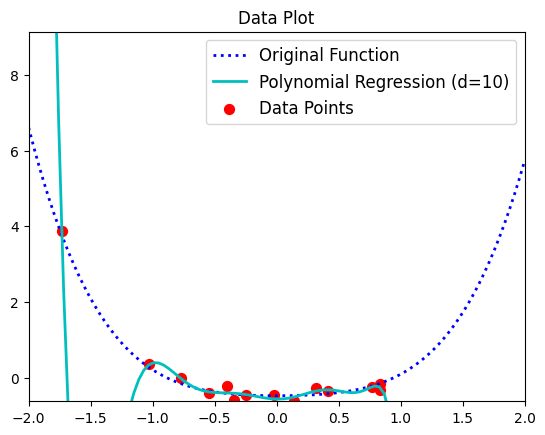

In [57]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est2, 'c-', linewidth=2, label="Polynomial Regression (d={})".format(degree2))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

### 5. [Challenging Problem] Explain the effect of degree (20pt)
- By solving the above problems, we can observe the behaviors of polynomial regression with different degrees (1, 4, 10)
- Explain pros and cons of high degree polynomial
- Explain pros and cons of low degree polynomial
- What is this phenomenon called in machine learning?

### The following figure shows all regression results with different degrees.

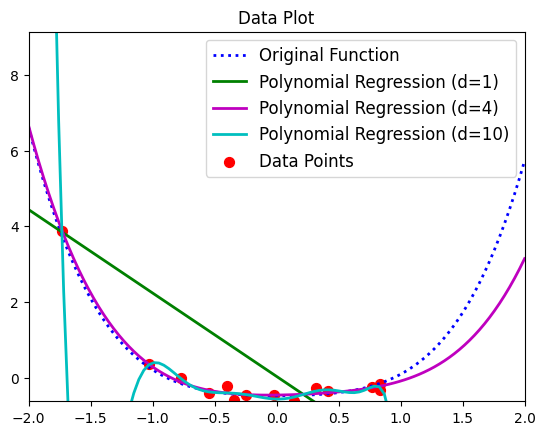

In [59]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est1, 'g-', linewidth=2, label="Polynomial Regression (d={})".format(1))
plt.plot(x_list, y_est, 'm-', linewidth=2, label="Polynomial Regression (d={})".format(4))
plt.plot(x_list, y_est2, 'c-', linewidth=2, label="Polynomial Regression (d={})".format(10))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

## Pros and cons of high degree polynomial
Pros:
- The main advantage of using a high degree in a polynomial regression is the accuracy when the original data is spread in a polynomial way, with the risk of overfitting.

Cons:
- The main disadvantage of using a high degree in a polynomial regression is the complexity of the calculus of the coefficients and the model in general.
- Another side-effect that we can consider a disadvantage is overfitting, which I've mentioned earlier. Overfitting is when we find a model with a higher degree than needed, and while it will pass through most of the original points, it won't predict the future points with high accuracy.

## Pros and cons of low degree polynomial
Pros:
- The main advantage of using a low degree in a polynomial regression is the efficiency of the calculus of the coefficients and the model in general.
- Another advantage is that most of the times, a high degree polynomial won't be needed, so we can use the low degree polynomial to adjust the regression correctly.

Cons:
- The most important disadvantage of using a low degree in a polynomial regression is the lower accuracy in comparison to higher degrees (just sometimes when the degree chosen isn't enough accurate).

## The phenomenon explained
The phenomenon is called the **Bias vs Variance trade-off**:

Bias refers to the error due to the model’s simplistic assumptions in fitting the data. A high bias means that the model is unable to capture the patterns in the data and this results in under-fitting. -> **Using a low degree**

Variance refers to the error due to the complex model trying to fit the data. High variance means the model passes through most of the data points and it results in over-fitting the data. -> **Using a high (higher than needed) degree**

From the graphs above we can observe that as the model complexity increases, the bias decreases and the variance increases and vice-versa. Ideally, a machine learning model should have low variance and low bias. But practically it’s impossible to have both. Therefore to achieve a good model that performs well both on the train and unseen data, a trade-off is made (we should find a balance between them in order to fit the model as accurate as possible).